In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-06-26 18:53:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  85.0MB/s    in 0.8s    

2021-06-26 18:53:07 (85.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.735.jpg', 'cat.864.jpg', 'cat.58.jpg', 'cat.205.jpg', 'cat.611.jpg', 'cat.262.jpg', 'cat.193.jpg', 'cat.933.jpg', 'cat.479.jpg', 'cat.291.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
inputs=keras.Input(shape=(150,150,3),name="img")
x=keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
x=keras.layers.Conv2D(32,(3,3),activation='relu')(x)
x=keras.layers.Conv2D(32,(3,3),activation='relu')(x)

In [8]:
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(256,activation='relu')(x)
x=keras.layers.Dropout(0.4)(x)
outputs=keras.layers.Dense(1,activation='sigmoid')(x)

In [9]:
model1=keras.Model(inputs,outputs,name="shallow_cnn")
model1.summary()

Model: "shallow_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 32)      9248      
_________________________________________________________________
flatten (Flatten)            (None, 663552)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               169869568 
_________________________________________________________________
dropout (Dropout)            (None, 256)               

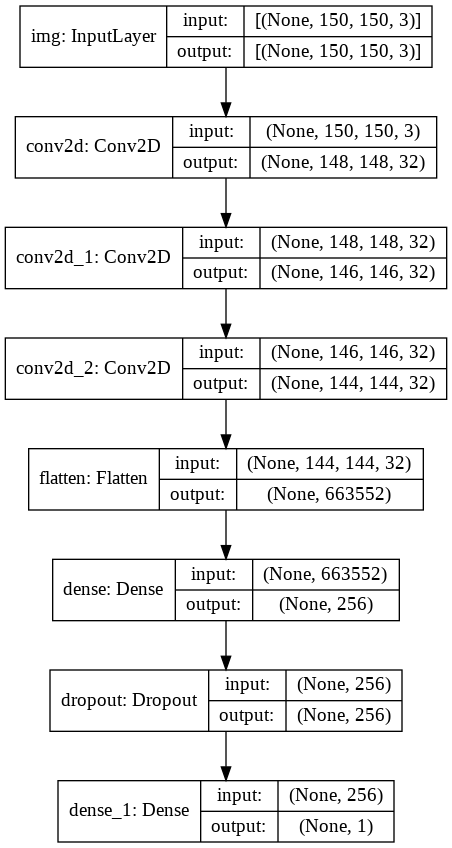

In [10]:
keras.utils.plot_model(model1,"shallow_CNN.png",show_shapes=True)

In [11]:
from keras_preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/cats_and_dogs_filtered/train', 
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')  

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        '/tmp/cats_and_dogs_filtered/validation',
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
import time
begin=time.time()
history=model1.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100,
)
time.sleep(1)
end=time.time()
print(f"Total runtime of the epochs is {end - begin}")

Epoch 1/10
100/100 [==============================] - 23s 194ms/step - loss: 2.8806 - accuracy: 0.5360 - val_loss: 0.6915 - val_accuracy: 0.5370
Epoch 2/10
100/100 [==============================] - 19s 192ms/step - loss: 0.7528 - accuracy: 0.5050 - val_loss: 0.6921 - val_accuracy: 0.5060
Epoch 3/10
100/100 [==============================] - 19s 190ms/step - loss: 0.9000 - accuracy: 0.5390 - val_loss: 0.6881 - val_accuracy: 0.5970
Epoch 4/10
100/100 [==============================] - 19s 191ms/step - loss: 0.7323 - accuracy: 0.5490 - val_loss: 0.6798 - val_accuracy: 0.5560
Epoch 5/10
100/100 [==============================] - 19s 189ms/step - loss: 0.7889 - accuracy: 0.5655 - val_loss: 0.6876 - val_accuracy: 0.5590
Epoch 6/10
100/100 [==============================] - 19s 188ms/step - loss: 0.7458 - accuracy: 0.5390 - val_loss: 0.6798 - val_accuracy: 0.5520
Epoch 7/10
100/100 [==============================] - 19s 189ms/step - loss: 0.7577 - accuracy: 0.5390 - val_loss: 0.7009 - val_ac

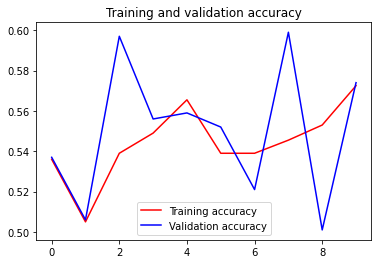

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

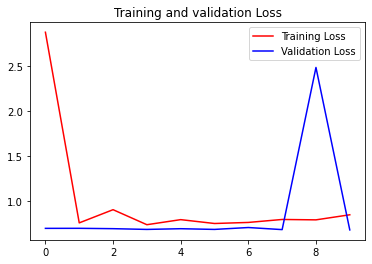

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
input2=keras.Input(shape=(150,150,3),name="res_img")
x2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(input2)
resA=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(x2)
x2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(resA)
resB=keras.layers.add([x2,resA])
x2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(resB)
resC=keras.layers.add([x2,resB])

In [20]:
x2=keras.layers.Flatten()(resC)
x2=keras.layers.Dense(256,activation='relu')(x2)
x2=keras.layers.Dropout(0.4)(x2)
output2=keras.layers.Dense(1,activation='sigmoid')(x2)

In [21]:
model2=keras.Model(input2,output2,name="shallow_cnn_with_res")
model2.summary()

Model: "shallow_cnn_with_res"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
res_img (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 150, 150, 32) 896         res_img[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 150, 150, 32) 9248        conv2d_11[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 150, 150, 32) 9248        conv2d_12[0][0]                  
_______________________________________________________________________________

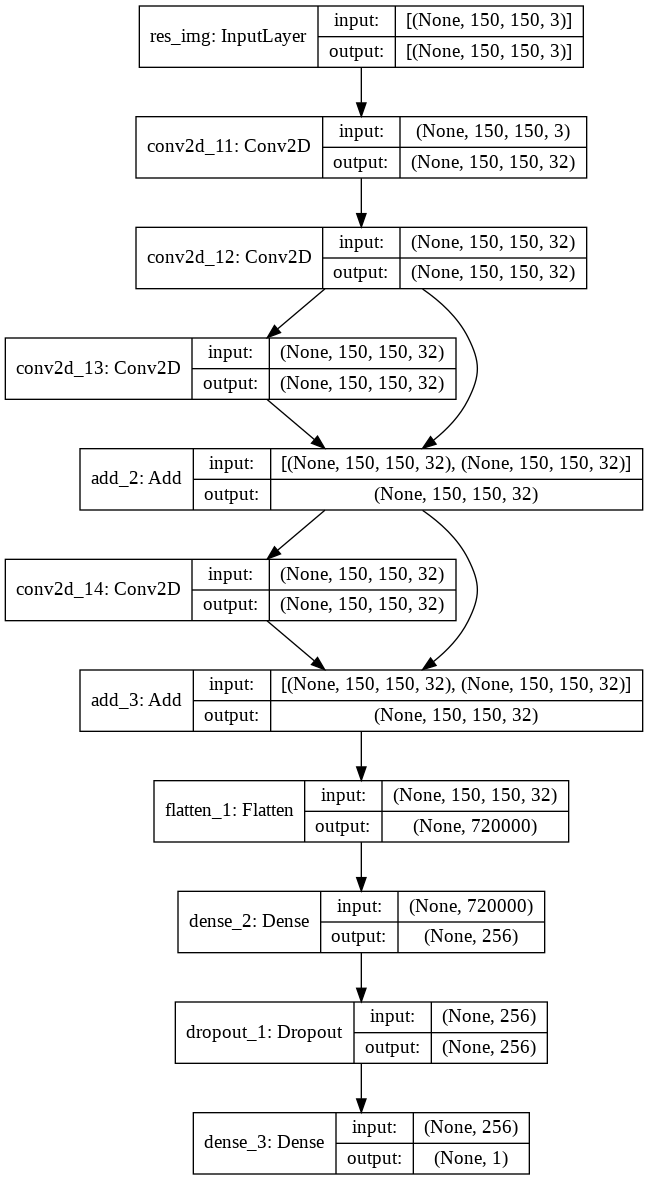

In [23]:
keras.utils.plot_model(model2,"shallow_CNN_with_Residual_Block.png",show_shapes=True)

In [24]:
from tensorflow.keras.optimizers import RMSprop

model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
begin=time.time()
history=model2.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=100,
)
time.sleep(1)
end=time.time()
print(f"Total runtime of the epochs with Residual Block is is {end - begin}")

Epoch 1/10
100/100 [==============================] - 21s 200ms/step - loss: 2.7468 - accuracy: 0.5210 - val_loss: 0.7011 - val_accuracy: 0.5430
Epoch 2/10
100/100 [==============================] - 20s 197ms/step - loss: 1.4682 - accuracy: 0.5385 - val_loss: 0.6491 - val_accuracy: 0.6240
Epoch 3/10
100/100 [==============================] - 20s 198ms/step - loss: 0.7408 - accuracy: 0.5595 - val_loss: 0.6863 - val_accuracy: 0.5980
Epoch 4/10
100/100 [==============================] - 20s 200ms/step - loss: 0.7179 - accuracy: 0.5535 - val_loss: 0.6659 - val_accuracy: 0.5900
Epoch 5/10
100/100 [==============================] - 20s 201ms/step - loss: 0.7431 - accuracy: 0.5675 - val_loss: 0.6551 - val_accuracy: 0.5760
Epoch 6/10
100/100 [==============================] - 20s 198ms/step - loss: 0.8358 - accuracy: 0.5800 - val_loss: 0.6631 - val_accuracy: 0.5450
Epoch 7/10
100/100 [==============================] - 20s 198ms/step - loss: 0.7737 - accuracy: 0.5715 - val_loss: 3.2494 - val_ac

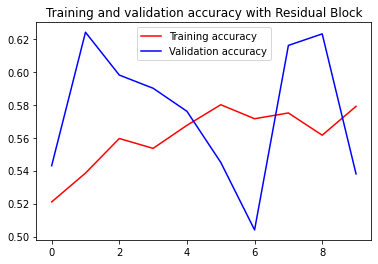

<Figure size 432x288 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with Residual Block')
plt.legend(loc=0)
plt.figure()


plt.show()

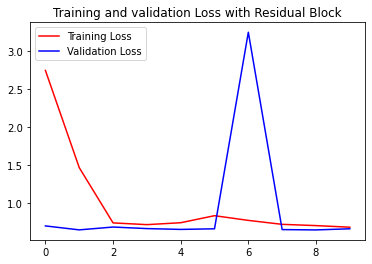

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss with Residual Block')
plt.legend(loc=0)
plt.figure()


plt.show()